Link For Blogpost: https://medium.com/@patelsaadn/top-5-swing-trading-algorithms-simplified-theory-and-python-implementation-b597156ab8df

[*********************100%***********************]  1 of 1 completed


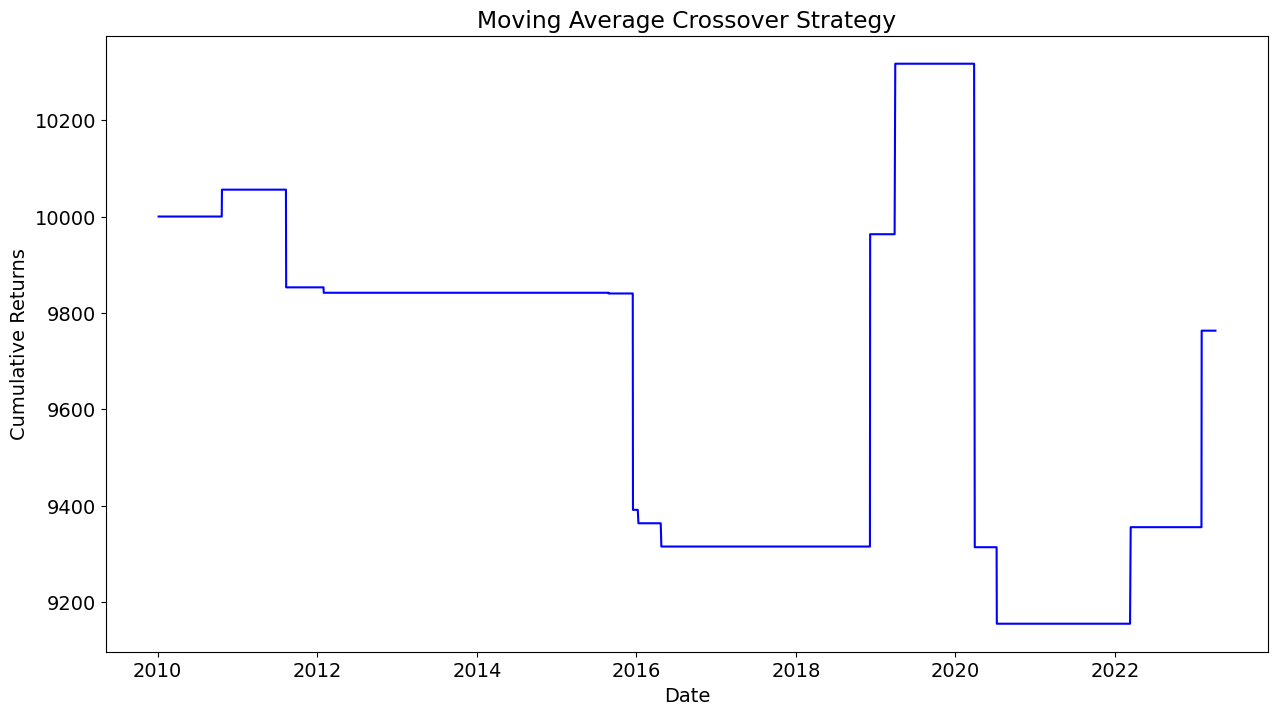

In [69]:
import pandas as pd
import numpy as np
import yfinance as yf

# Download historical data from Yahoo Finance
ticker = 'SPY'
data = yf.download(ticker, start='2010-01-01', end='2023-04-07')

# Define short-term and long-term moving averages
short_ma = 50
long_ma = 200

# Calculate moving averages
data['short_ma'] = data['Close'].rolling(short_ma).mean()
data['long_ma'] = data['Close'].rolling(long_ma).mean()

# Create a new column to signal buy/sell orders
data['Signal'] = np.where(data['short_ma'] > data['long_ma'], 1, 0)
data['Position'] = data['Signal'].diff()

# Set up initial capital and position size
capital = 10000
position_size = capital / len(data)

# Calculate daily returns
data['Returns'] = data['Close'].pct_change()

# Calculate strategy returns
data['Strategy_Returns'] = data['Position'] * data['Returns'] * position_size

# Calculate cumulative returns
data['Cumulative_Returns'] = (1 + data['Strategy_Returns']).cumprod() * capital

# Plot cumulative returns
# data['Cumulative_Returns'].plot(figsize=(10, 6), title='Moving Average Crossover Strategy', colour = 'r')

plt.figure(figsize=(15,8))
plt.plot(data['Cumulative_Returns'], 'b')
plt.title('Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

[*********************100%***********************]  1 of 1 completed


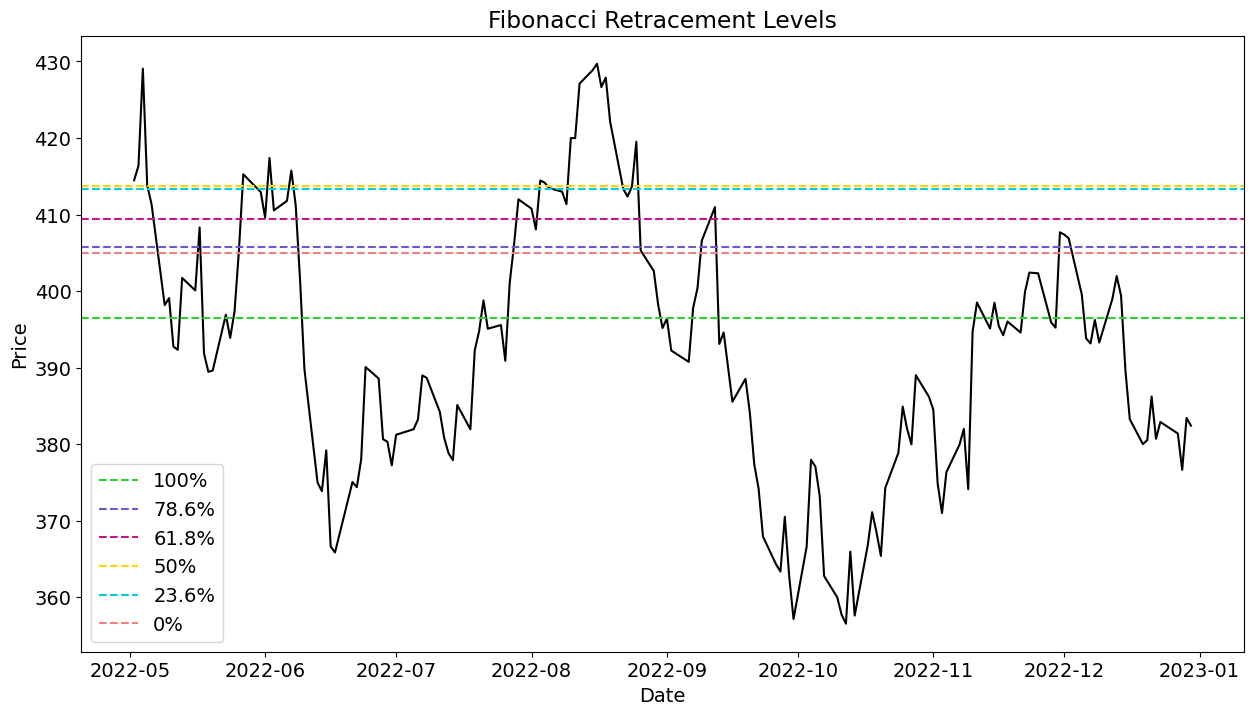

In [58]:
# Fibonacci Retracement Levels
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data from Yahoo Finance
ticker = 'SPY'
data = yf.download(ticker, start='2022-05-01', end='2023-01-01')

# Calculate the high, low, and close prices
high = data['High']
low = data['Low']
close = data['Close']

# Calculate the range of the price movement
range_price = high - low

# Calculate the retracement levels
retracements = [0,0.236, 0.5, 0.618, 0.786,1]

# Calculate the retracement levels in terms of price levels
retracement_levels = []
for retracement in retracements:
    retracement_level = high - (range_price * retracement)
    retracement_levels.append(retracement_level)

# Plot the Fibonacci retracement levels
plt.figure(figsize=(15,8))
plt.plot(close, 'k')
# for i, retracement_level in enumerate(retracement_levels):
# plt.axhline(retracement_level[4], linestyle='--', label=f'{retracements[4]*100}%')
plt.axhline(retracement_level[5], color="limegreen", linestyle="--", label="100%")
plt.axhline(retracement_level[4], color="slateblue", linestyle="--", label="78.6%")
plt.axhline(retracement_level[3], color="mediumvioletred", linestyle="--", label="61.8%")
plt.axhline(retracement_level[2], color="gold", linestyle="--", label="50%")
plt.axhline(retracement_level[1], color="darkturquoise", linestyle="--", label="23.6%")
plt.axhline(retracement_level[0], color="lightcoral", linestyle="--", label="0%")

plt.legend()
plt.title('Fibonacci Retracement Levels')
plt.xlabel('Date')
plt.ylabel('Price $')
plt.show()


[*********************100%***********************]  1 of 1 completed


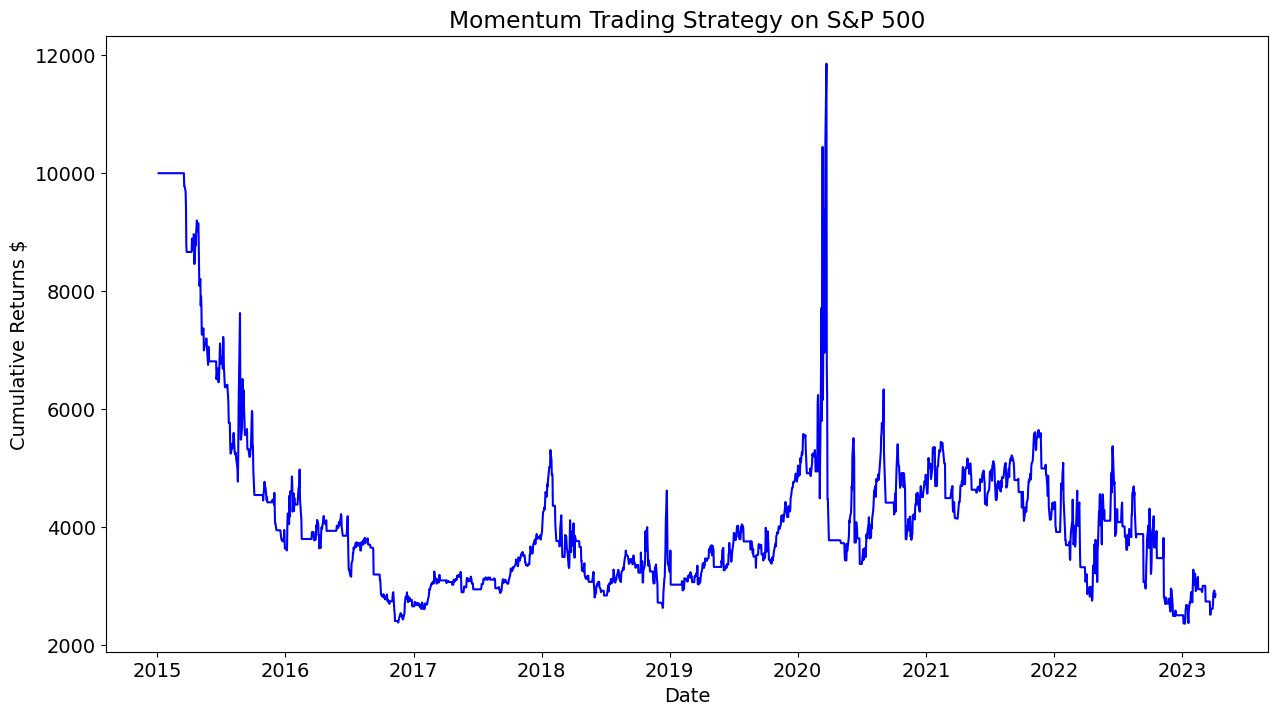

In [63]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data from Yahoo Finance
ticker = 'SPY'
data = yf.download(ticker, start='2015-01-01', end='2023-04-07')

# Calculate the 10-day and 50-day rate of change (ROC)
data['10d_roc'] = data['Close'].pct_change(periods=10)
data['50d_roc'] = data['Close'].pct_change(periods=50)

# Create a new column called "position" that signals buy/sell orders based on the momentum
data['position'] = 0
data.loc[(data['10d_roc'] > 0) & (data['50d_roc'] > 0), 'position'] = 1
data.loc[(data['10d_roc'] < 0) & (data['50d_roc'] < 0), 'position'] = -1

# Set up initial capital and position size
capital = 10000
position_size = capital / len(data)

# Calculate daily returns
data['daily_returns'] = data['Close'].pct_change()

# Calculate strategy returns
data['strategy_returns'] = data['position'].shift(1) * data['daily_returns'] * position_size

# Calculate cumulative returns
data['cumulative_returns'] = (1 + data['strategy_returns']).cumprod() * capital

# Plot cumulative returns
plt.figure(figsize=(15,8))
plt.plot(data['cumulative_returns'], 'b')
plt.title('Momentum Trading Strategy on S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns $')
plt.show()


[*********************100%***********************]  1 of 1 completed
[(Timestamp('2023-01-19 00:00:00'), 387.260009765625), (Timestamp('2023-02-02 00:00:00'), 418.30999755859375), (Timestamp('2023-03-06 00:00:00'), 407.45001220703125), (Timestamp('2023-03-13 00:00:00'), 380.6499938964844)]


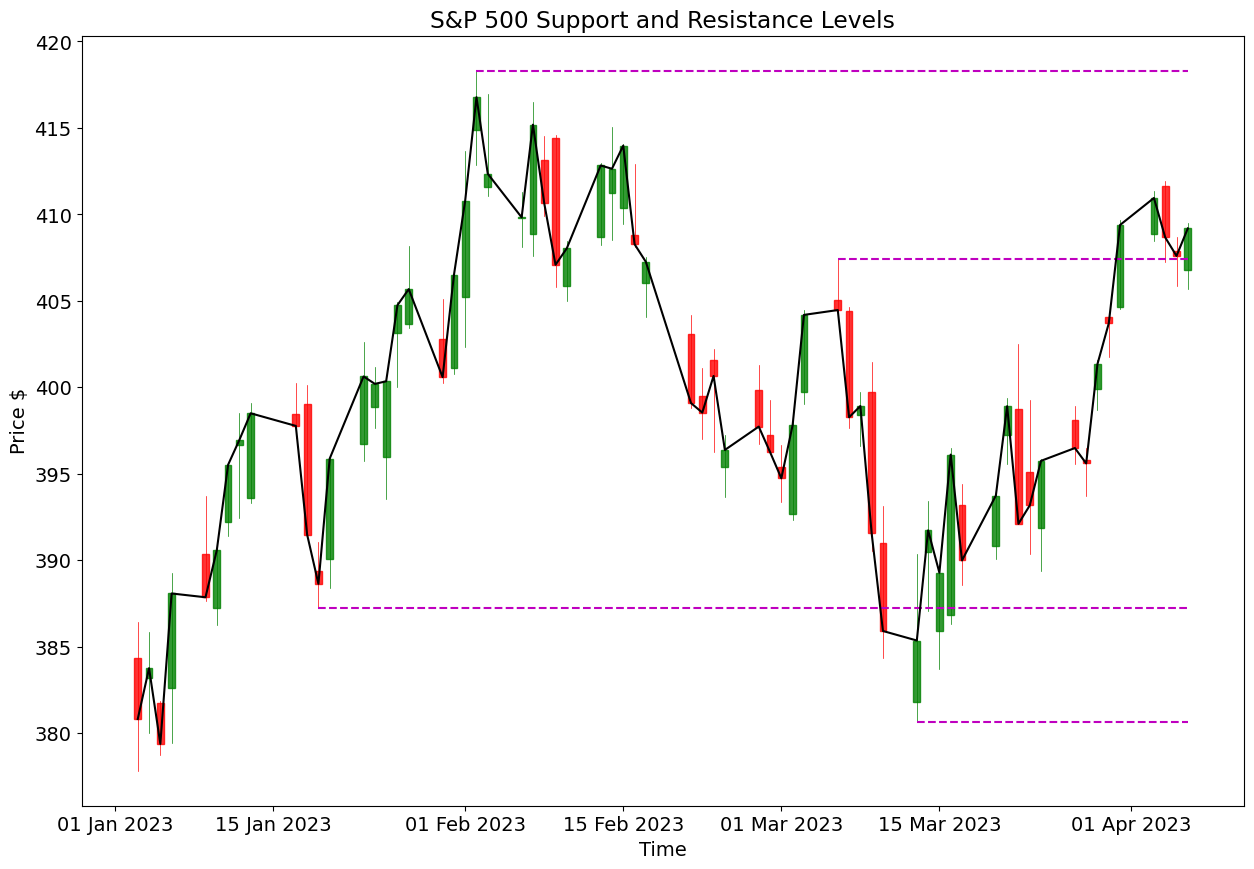

In [53]:
# Support and Reistance Levels 4

import pandas as pd
import yfinance as yf
import numpy as np
import math
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt


def get_stock_data(stock_symbol):
  data = yf.download(stock_symbol, start='2023-01-01', threads= False)
  data['Date'] = pd.to_datetime(data.index)
  data['Date'] = data['Date'].apply(mpl_dates.date2num)
  data = data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
  return data


def is_far_from_level(value, levels, data):    
  ave =  np.mean(data['High'] - data['Low'])    
  return np.sum([abs(value-level)<ave for _,level in levels])==0

def plot_all(levels, data):    
  fig, ax = plt.subplots(figsize=(15, 10))   
  candlestick_ohlc(ax,data.values,width=0.6, colorup='green', colordown='red', alpha=0.8)    
  date_format = mpl_dates.DateFormatter('%d %b %Y')
  
  ax.xaxis.set_major_formatter(date_format)    
  for level in levels:        
    plt.hlines(level[1], xmin = data['Date'][level[0]], xmax = max(data['Date']), colors='m', linestyle='--')
  plt.plot(data['Close'], 'k')
  plt.ylabel('Price $') 
  plt.xlabel('Time') 
  plt.title("S&P 500 Support and Resistance Levels")    
  fig.show()

stock_symbol = 'SPY'
data = get_stock_data(stock_symbol)

pivot_levels = []
maxi_list = []
mini_list = []
for i in range(5, len(data)-5):
  # taking a window of 9 candles
  high_range = data['High'][i-5:i+4]
  current_maxi = high_range.max()
  # if we find a new maximum value, empty the maxi_list 
  if current_maxi not in maxi_list:
    maxi_list = []
  maxi_list.append(current_maxi)
  # if the maximum value remains the same after shifting 5 times
  if len(maxi_list)==5 and is_far_from_level(current_maxi,pivot_levels,data):
      pivot_levels.append((high_range.idxmax(), current_maxi))
    
  low_range = data['Low'][i-5:i+5]
  current_mini = low_range.min()
  if current_mini not in mini_list:
    mini_list = []
  mini_list.append(current_mini)
  if len(mini_list)==5 and is_far_from_level(current_mini,pivot_levels,data):
    pivot_levels.append((low_range.idxmin(), current_mini))
print(pivot_levels)
plot_all(pivot_levels, data)

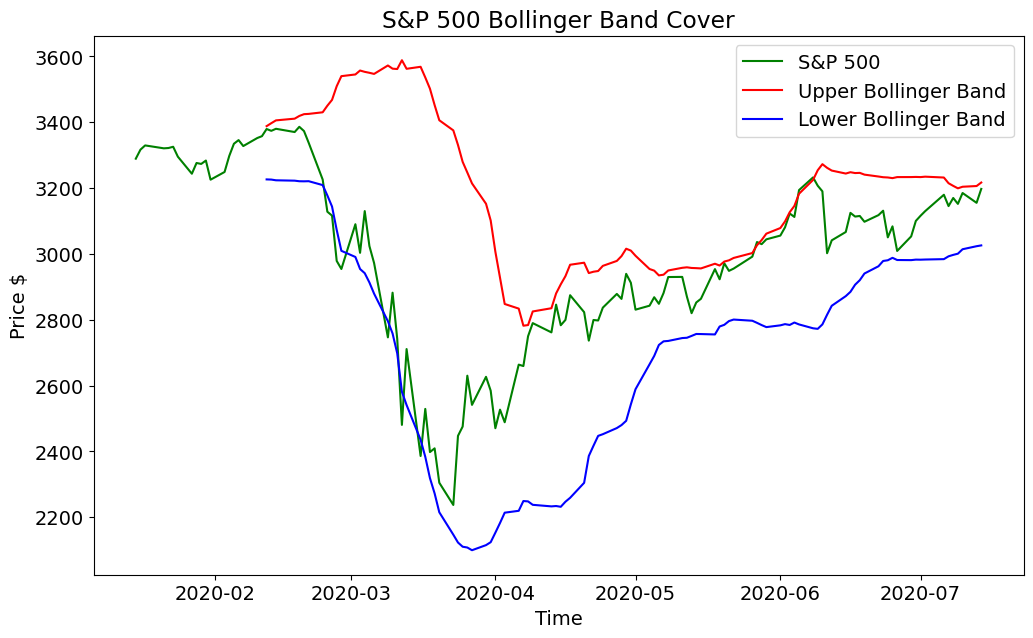

In [64]:
# Bollinger Band 5

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import ta

ticker = yf.Ticker('^GSPC')
df = ticker.history(interval="1d",start="2020-01-15",end="2020-07-15")

period = 20
multiplier = 2
df['UpperBand'] = df['Close'].rolling(period).mean() + df['Close'].rolling(period).std() * multiplier
df['LowerBand'] = df['Close'].rolling(period).mean() - df['Close'].rolling(period).std() * multiplier

plt.rcParams['figure.figsize'] = [12, 7]

plt.rc('font', size=14)

plt.plot(df['Close'], 'g', label = "S&P 500")
plt.plot(df['UpperBand'], 'r' , label = "Upper Bollinger Band")
plt.plot(df['LowerBand'], 'b', label = "Lower Bollinger Band")
plt.ylabel('Price $') 
plt.xlabel('Time') 
plt.title("S&P 500 Bollinger Band Cover")    

plt.legend()

plt.show()
